In [1]:
!pip install astroNN




[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# dataset import için link
https://astronn.readthedocs.io/en/latest/galaxy10.html

In [5]:
# veri seti yuklemesi astroNN sitesinden galaxy10 veriseti
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
images, labels = galaxy10.load_data()

C:\Users\Asus\.astroNN\datasets\Galaxy10_DECals.h5 was found!


# veri seti imgeler ve etiketleri indirme

In [3]:

images, labels = galaxy10.load_data()

C:\Users\Asus\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [4]:
type(labels)

numpy.ndarray

In [5]:
len(images)

17736

In [6]:
images[0].shape

(256, 256, 3)

In [7]:
import numpy as np
np.unique(labels, axis=None)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
# imge gösterme
def show_image(image1, image2, title1="image1",title2="image2"):
    fig = plt.figure(figsize=(7, 7))
  
    rows = 2
    columns = 2
  
    fig.add_subplot(rows, columns, 1)
  
    # showing og image
    plt.imshow(image1)
    plt.axis('off')
    plt.title(title1)
  

    fig.add_subplot(rows, columns, 2)
  
    # showing resized image
    plt.imshow(image2)
    plt.axis('off')
    plt.title(title2)

In [9]:
# boyutlar eşit olmalı eşit mi kontrolü
for image in images:
    if image.shape !=(256,256,3):
        print(image.shape)
    
else:
    print("end")
    

end


In [7]:
# eğitim için gerekli kütüphaneler
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten ,MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import cv2
import os
import PIL

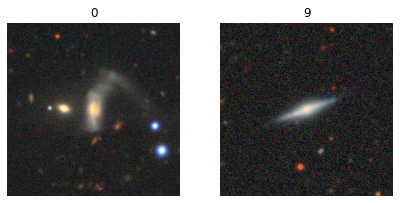

In [11]:
show_image(images[0],images[17735],labels[0],labels[17735])

# boyutu aynı olmalı ve bu projede 100x100 boyutu olarak seçildi

In [8]:
X=[]
for image in images:
    resized_img = cv2.resize(image,(100,100))
    X.append(resized_img)

In [13]:
labels[3000]

2

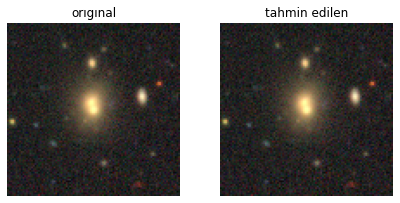

In [13]:
show_image(X[2000],X[2000],"orıgınal","tahmin edilen")

In [15]:
# veri bölme train ve test veri seti
X_train, X_test, y_train, y_test = train_test_split(X, labels, random_state=0)

In [16]:
# optimizasyon 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train=X_train/255
X_test=X_test/255

In [68]:
X_train[1].shape

(100, 100, 3)

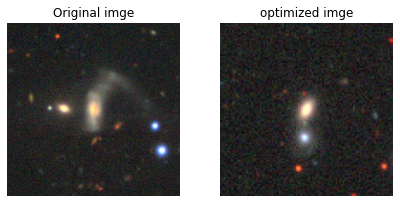

In [21]:
# optimized imge 
show_image(images[0], X_train[5],"Original imge","optimized imge")

In [70]:
# cnn modul
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(100,100,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               18874496  
                                                      

In [71]:
model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# EPOCHS=20       

In [72]:
# model egitlme
history=m
odel.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
416/416 [==============================] - 216s 516ms/step - loss: 2.1094 - accuracy: 0.2094 - val_loss: 1.9200 - val_accuracy: 0.2770
Epoch 2/20
416/416 [==============================] - 213s 511ms/step - loss: 1.8892 - accuracy: 0.3006 - val_loss: 1.7614 - val_accuracy: 0.3599
Epoch 3/20
416/416 [==============================] - 213s 511ms/step - loss: 1.7623 - accuracy: 0.3530 - val_loss: 1.6358 - val_accuracy: 0.4226
Epoch 4/20
416/416 [==============================] - 212s 509ms/step - loss: 1.6526 - accuracy: 0.4004 - val_loss: 1.5397 - val_accuracy: 0.4447
Epoch 5/20
416/416 [==============================] - 218s 523ms/step - loss: 1.5763 - accuracy: 0.4358 - val_loss: 1.4209 - val_accuracy: 0.4968
Epoch 6/20
416/416 [==============================] - 240s 576ms/step - loss: 1.5050 - accuracy: 0.4641 - val_loss: 1.3811 - val_accuracy: 0.5244
Epoch 7/20
416/416 [==============================] - 225s 542ms/step - loss: 1.4500 - accuracy: 0.4832 - val_loss: 1.3353 -

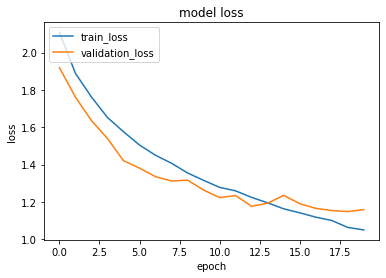

In [73]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='upper left')
plt.show()

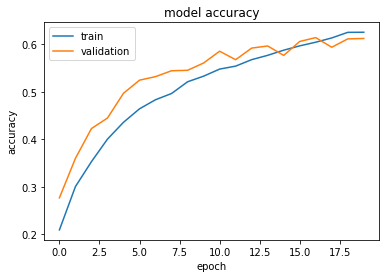

In [74]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [1]:
rounded_predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [76]:
rounded_labels=np.argmax(rounded_predictions, axis=1)

In [107]:
rounded_labels[:10]

array([1, 7, 3, 9, 6, 1, 7, 9, 6, 1], dtype=int64)

In [108]:
y_test[:10]



array([6, 6, 3, 9, 5, 1, 0, 9, 6, 1], dtype=uint8)

In [91]:
model.save("galaxy.h5")

In [94]:
image=images[1]

In [95]:
image=cv2.resize(image,(100,100))

In [97]:
image = image.reshape(1,100,100,3)

In [98]:
pred=model.predict(image)

1/1 [==============================] - 0s 115ms/step


In [99]:
pred

array([[1.1249575e-21, 2.1613304e-10, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.9199915e-30, 0.0000000e+00,
        9.6630784e-19, 0.0000000e+00]], dtype=float32)

In [100]:
np.argmax(pred)

5